In [1]:
#importing libraries
import networkx as nx
import matplotlib.pyplot as plt
import random
import pickle

In [2]:
# Adding weights to the ICM graph
def assign_weights(graph):
    for u,v in graph.edges():
        weight = 1/(graph.degree(v))
        graph[u][v]['weight'] = weight
    return graph

In [3]:
# Function to generate the graphs with random weights
def sample_w_icm(g, num_of_networks):
    gen_nets = []
    for n in range(num_of_networks):
        h = nx.Graph()
        h.add_nodes_from(g.nodes())
        for u,v in g.edges():
            if random.random() < g[u][v]['weight']:
                h.add_edge(u,v)
        gen_nets.append(h)
    return gen_nets

In [25]:
# Find the average coverage of the node
def average_coverage(g, lst):
    A = set()
    node_list = list(g.nodes)
    list_of_coverage = []
    
    for node in g.nodes:
        average = 0
        x = 0
        for network in lst:
            paths = []
            for path in nx.shortest_path(network, node):
                paths.append(path)
            paths    
            # print(f"Nodes in iteration path for {network} is:", paths)
            x += len(paths)
        average = x/(len(lst))
        list_of_coverage.append(average)
    
    return list_of_coverage

In [23]:
# Greedy Algorithm
def greedy(lst, k):
    temp_list = []
    temp_list = lst[:]
    # print(len(lst))
    # print(lst)
    x = 0
    A = set()
    while len(A) < k:
        temp = []
        for i in range(len(lst)):
            y = 0
            y = (x + temp_list[i]) - x
            temp.append(y)
        index = temp.index(max(temp))
        x += max(temp)
        # print("Selected Node: ", (index+1))
        temp_list[index] = 0 # set the number to zero to prevent it being selected in the next iteration
        A.add(index+1)
    # print("Temp List: ", temp_list)
    # print("Original List", lst)
    return A, x

In [6]:
# Working on the fairness data
g = pickle.load(open('networks/graph_spa_500_0.pickle','rb')) 

In [7]:
# Assigning weigths to the edges
graph = assign_weights(g)

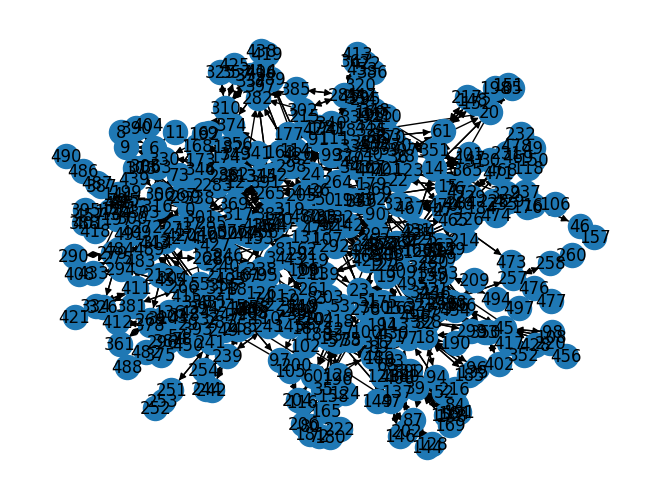

In [8]:
# Drawing the original graph
nx.draw(graph, with_labels=True)
plt.show()

Now, we are going to run the greedy algorithm to find the influence maximization for k <= 3. We are randomly going to flip the weights. If the random weight is less than the weight (probability), we can say the edge exist. We will then run the greedy algorithm for all instances of the generated network and find the average number of nodes each one can cover.

In [9]:
# Generating 100000 networks from the base network
num_nets = 1000
net_list = sample_w_icm(graph, num_nets)
net_list[0:10] 

In [11]:
net_list[100].nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [13]:
net_list[100].edges()

EdgeView([(2, 5), (8, 9), (12, 192), (13, 75), (14, 27), (14, 30), (15, 16), (15, 31), (17, 197), (20, 198), (21, 97), (22, 26), (22, 28), (23, 156), (24, 42), (24, 172), (24, 170), (27, 159), (29, 32), (29, 34), (30, 150), (30, 118), (35, 51), (35, 181), (37, 214), (38, 58), (40, 210), (41, 183), (43, 131), (43, 154), (44, 149), (44, 194), (44, 53), (44, 56), (45, 93), (46, 157), (49, 118), (51, 89), (52, 191), (53, 109), (55, 88), (57, 100), (61, 217), (62, 64), (66, 81), (67, 71), (69, 192), (70, 123), (70, 167), (71, 133), (76, 184), (77, 190), (81, 130), (83, 127), (84, 164), (85, 112), (86, 99), (87, 144), (87, 128), (91, 177), (91, 215), (95, 208), (100, 113), (102, 105), (104, 207), (104, 119), (111, 163), (115, 160), (119, 140), (122, 256), (123, 221), (134, 171), (138, 153), (142, 223), (148, 152), (161, 213), (163, 174), (163, 182), (175, 263), (186, 208), (187, 238), (211, 219), (223, 233), (224, 227), (229, 461), (230, 236), (231, 232), (231, 263), (238, 240), (239, 243), 

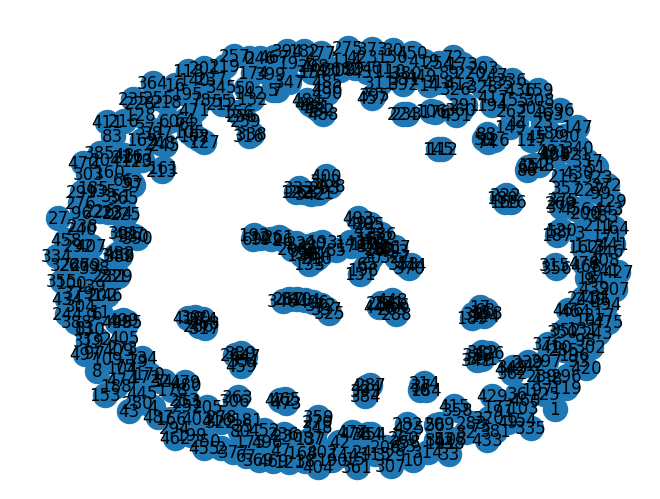

In [29]:
nx.draw(net_list[10], with_labels=True)
plt.show()

In [27]:
# Generate a list of average coverage for each node
average_nodes_covered = average_coverage(graph, net_list)
average_nodes_covered[0:10]

[2.92, 3.064, 3.191, 2.55, 2.421, 4.395, 4.821, 3.12, 3.326, 4.092]

In [28]:
# Selecting 30 nodes greedily
k = 30
Set, coverage = greedy(average_nodes_covered, 30)
print("Set of Nodes That yield max coverage: ", Set)
print("Average influence: ", coverage)

Set of Nodes That yield max coverage:  {264, 265, 266, 267, 13, 14, 15, 272, 16, 18, 19, 22, 279, 281, 288, 34, 35, 36, 38, 298, 299, 44, 45, 304, 54, 314, 86, 482, 239, 123}
Average influence:  180.54500000000002
